## Week8 LogisticRegression
In week 8, we've covered:
* Logistic regression
* Build logistic regression model with Sklearn  

Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO**.

Upload **Week8_LogisiceRegression_Homework.ipynb**, `train.csv` and `test.csv` to Google Drive.

The dataset is about predicting which passengers `Survived` the **sinking of the Titanic**.

Below are the descriptions contained in that data dictionary:

- PassengerID - A column added by us to identify each row and make submissions easier  
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)  
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)  
- Sex - The passenger's sex  
- Age - The passenger's age in years  
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic  
- Parch - The number of parents or children the passenger had aboard the Titanic  
- Ticket - The passenger's ticket number  
- Fare - The fare the passenger paid  
- Cabin - The passenger's cabin number  
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)  

In this homework, you're going to apply the data wrangling and visualization skills you've learnt in the past 7 weeks to get a good understanding of the dataset and build a ML model to predict which passengers survived the **sinking of the Titanic**.

The type of machine learning you will be doing is called classification, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. For example, anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers. This indicates that Age, Sex, and PClass may be good predictors of survival.

Here are the recommended steps:

* Explore the data and learn about the topic
* Prepare data for machine learning
* Train a Logistic Regression model
* Measure the accuracy of your model

### Import data

In [225]:
# TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [226]:
#upload Train Data sets from google
from google.colab import files

In [227]:
validation = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [228]:
#shape of both train and test data set
print("Train shape", train.shape)
print("Validation shape", validation.shape)
train.head()



Train shape (891, 12)
Validation shape (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Describe and understand train data

In [229]:
features = train.drop('Survived', axis=1)
target = train['Survived']


from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the split sets
print("Training data shape: features", features_train.shape)
print("Testing data shape: features", features_test.shape)

print("Training data shape: target", target_train.shape)
print("Testing data shape: test", target_test.shape)



Training data shape: features (712, 11)
Testing data shape: features (179, 11)
Training data shape: target (712,)
Testing data shape: test (179,)


In [230]:
#describing and looking at null values for train data set
print(train.describe(include = 'all'))
print(train.isnull().sum())
print(train.dtypes)

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

0.0
2
0    549
1    342
Name: Survived, dtype: int64
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


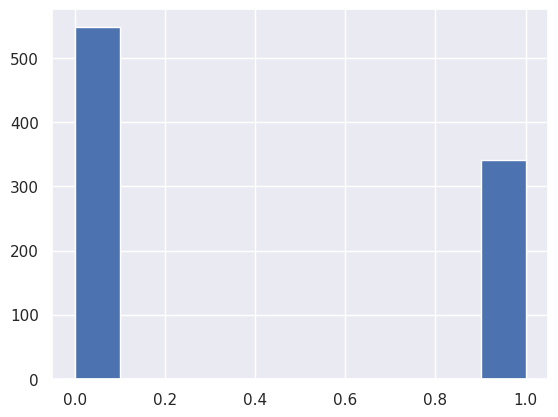

In [231]:
#understanding survived column
print(train["Survived"].isnull().mean())
print(train["Survived"].nunique())
print(train["Survived"].value_counts())
print(train["Survived"].describe())
train["Survived"].hist()
plt.show()

<ipython-input-232-b5d5f346b8e5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train.hist(ax = ax)


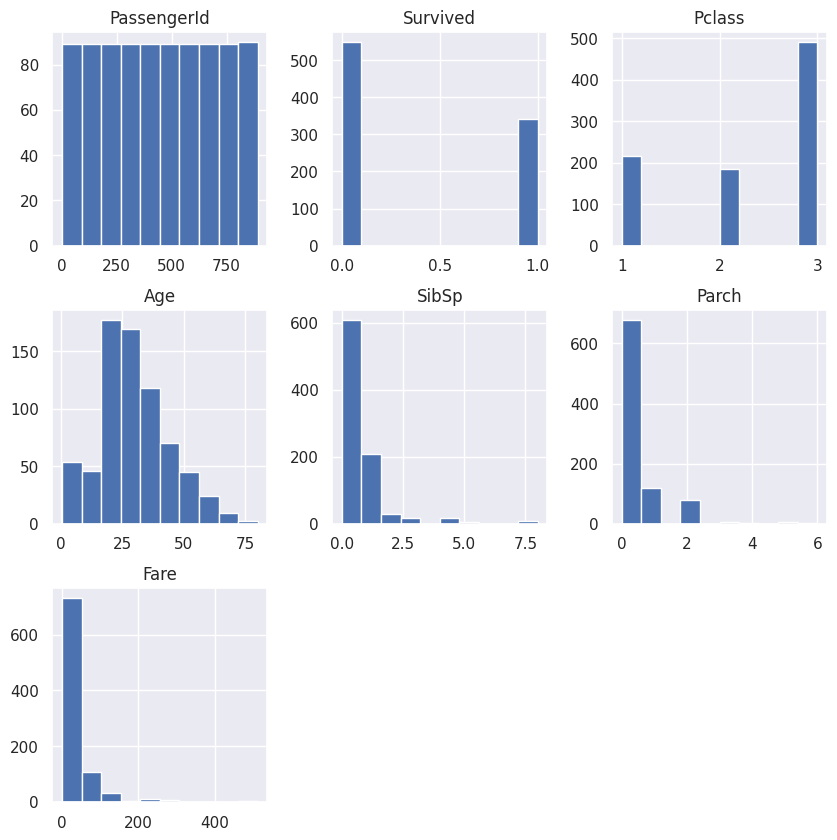

In [232]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
train.hist(ax = ax)
plt.show()

In [233]:
#understanding pclass -
print(train["Pclass"].isnull().mean())
print(train["Pclass"].nunique())
print(train["Pclass"].value_counts())
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
#Pclass looks to be signficant to survived (No additional Cleaning Needed)

0.0
3
3    491
1    216
2    184
Name: Pclass, dtype: int64


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [234]:
#understanding pclass - Sex
print(train["Sex"].isnull().mean())
print(train["Sex"].nunique())
print(train["Sex"].value_counts())

#Sex apprears to have a coorelation with survived as well;

train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

0.0
2
male      577
female    314
Name: Sex, dtype: int64


,Survived
Sex,
female,0.742038
male,0.188908


In [235]:
#(Cleaning will be needed to update to 0 and 1 for modeling)
features_train['Sex_Clean'] = features_train['Sex'].map( {'female': True, 'male': False} ).astype(bool)
features_test['Sex_Clean'] = features_test['Sex'].map( {'female': True, 'male': False} ).astype(bool)
validation['Sex_Clean'] = validation['Sex'].map( {'female': True, 'male': False} ).astype(bool)

In [236]:
#understanding pclass - Age
print(train["Age"].isnull().mean())
print(train["Age"].nunique())
print(train["Age"].describe())

def grouping(v):
  if v <= 4 :
    return "0-5"
  elif v <= 17 :
    return "06-17"
  elif v <= 25 :
    return "18-25"
  elif v <= 35 :
    return "26-35"
  elif v <= 50 :
    return "36-50"
  elif v <= 85 :
    return "51-85"
  else:
    return "null"

def grouping2(v):
  if v <= 4 :
    return True
  else:
    return False

train["age_group"] = train["Age"].apply(lambda v : grouping(v))
train[['age_group', 'Survived']].groupby(['age_group']).mean().sort_values(by='age_group')

#train[['age_group', 'Survived']].groupby(['age_group']).count().sort_values(by='Survived', ascending=False)
#train[['age_group', 'Survived',"Sex"]].groupby(['age_group',"Sex"]).mean().sort_values(by='age_group', ascending=False)



0.19865319865319866
88
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


,Survived
age_group,
0-5,0.675000
06-17,0.465753
18-25,0.335106
26-35,0.423469
36-50,0.398693
51-85,0.343750
null,0.293785


In [237]:
train.groupby([train["Age"].apply(lambda v : grouping(v))]).mean()


#could eventually use this type of data to help predict age


<ipython-input-237-83d97e9f6fdf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby([train["Age"].apply(lambda v : grouping(v))]).mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
0-5,414.050000,0.675000,2.550000,2.254250,1.700000,1.375000,32.409062
06-17,437.520548,0.465753,2.602740,12.760274,1.328767,0.876712,30.569695
18-25,445.398936,0.335106,2.457447,21.539894,0.340426,0.287234,30.356581
26-35,452.040816,0.423469,2.295918,30.303571,0.316327,0.173469,30.592323
36-50,464.339869,0.398693,1.921569,42.068627,0.385621,0.535948,44.118246
51-85,443.875000,0.343750,1.546875,58.718750,0.250000,0.296875,43.604819
null,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [238]:
#cleaning Age Data Set (Potentially a better way to do this long term, but this will work for now. Need to revisit)
average_age = features_train['Age'].mean()

features_train['Age_Clean'] = features_train["Age"].fillna(average_age)
features_test['Age_Clean'] = features_test["Age"].fillna(average_age)
validation['Age_Clean'] = validation["Age"].fillna(average_age)



In [239]:
#understanding siblings:
print(train["SibSp"].isnull().mean())
print(train["SibSp"].value_counts())
print(train["SibSp"].describe())

train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='SibSp')
#68% of individuals didn't have a sibling.

0.0
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [240]:
def sibgroup(s):
  if s == 0 :
    return 0
  if s >0  :
    return 1
  else:
    return 3

train["SibSp_Group"] = train["SibSp"].apply(lambda s : sibgroup(s))
train[['SibSp_Group', 'Survived']].groupby(['SibSp_Group']).mean().sort_values(by='SibSp_Group')

,Survived
SibSp_Group,
0,0.345395
1,0.466431


In [241]:
#cleaning/modeling data based on siblings:
#0 = 0
#1 = 1 or 2
#2 = 3+
#3 = something else

features_train['SibSp_Group'] = features_train["SibSp"].apply(lambda s : sibgroup(s))
features_test['SibSp_Group'] = features_test["SibSp"].apply(lambda s : sibgroup(s))
validation['SibSp_Group'] = validation["SibSp"].apply(lambda s : sibgroup(s))


In [242]:
#understanding Parch:
print(train["Parch"].isnull().mean())
print(train["Parch"].value_counts())
print(train["Parch"].describe())

train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Parch')

#76% of individuals were traveling without a parent|Feels like this data point could overlap with the sibling data point

#potentially a way to look at travel with people vs alone?

0.0
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [243]:
train["Parch_Group"] = train["Parch"].apply(lambda s : sibgroup(s))
print(train[['Parch_Group','SibSp_Group', 'Survived']].groupby(['Parch_Group', 'SibSp_Group']).mean().sort_values(by='Parch_Group'))

train["Alone"] = train["Parch_Group"] + train["SibSp_Group"]
print(train[['Alone','Survived']].groupby(['Alone']).mean().sort_values(by='Alone'))

                         Survived
Parch_Group SibSp_Group          
0           0            0.303538
            1            0.496454
1           0            0.661972
            1            0.436620
       Survived
Alone          
0      0.303538
1      0.551887
2      0.436620


In [244]:
#alone =0
# either parent or sibling = 1
# both parent and sibling =2

features_train['Parch_Group'] = features_train["Parch"].apply(lambda s : sibgroup(s))
features_test['Parch_Group'] = features_test["Parch"].apply(lambda s : sibgroup(s))
validation['Parch_Group'] = validation["Parch"].apply(lambda s : sibgroup(s))

features_train['Travel_Alone'] = features_train["Parch_Group"] + features_train["SibSp_Group"]
features_test['Travel_Alone'] = features_test["Parch_Group"] + features_test["SibSp_Group"]
validation['Travel_Alone'] = validation["Parch_Group"] + validation["SibSp_Group"]

In [245]:
#ticket understanding:
print(train["Ticket"].isnull().mean())
print(train["Ticket"].nunique())
train["Ticket"].value_counts()

#lots of duplicate values within, doesn't apprear to be helpful data given duplicates, etc.

0.0
681


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [246]:
#understanding Fare:
print(train["Fare"].isnull().mean())
print(train["Fare"].value_counts())
print(train["Fare"].describe())

train[['Fare', 'Pclass']].groupby(['Pclass']).mean().sort_values(by='Pclass')
avg_fare = features_train["Fare"].mean()
#fare is closely related to Pclass

0.0
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [247]:
features_train["Fare_Clean"]= features_train["Fare"].fillna(avg_fare)
features_test["Fare_Clean"]= features_test["Fare"].fillna(avg_fare)
validation["Fare_Clean"]= validation["Fare"].fillna(avg_fare)

In [248]:
#understanding Cabin:
print(train["Cabin"].isnull().mean())
print(train["Cabin"].value_counts())
print(train["Cabin"].describe())

#Majority of the Cabin data is null, so will not use this. Will plan to drop this column.

0.7710437710437711
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object


In [249]:
#understanding Embarked:
print(train["Embarked"].isnull().mean())
print(train["Embarked"].value_counts())
print(train["Embarked"].describe())

null_rows = train.loc[train['Embarked'].isnull()]
print(null_rows)
#train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Embarked')
features_train["Embarked_fill"]= features_train['Embarked'].fillna("S")
features_train["Embarked_Clean"]= features_train['Embarked_fill'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

features_test["Embarked_fill"]= features_test['Embarked'].fillna("S")
features_test["Embarked_Clean"]= features_test['Embarked_fill'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

validation["Embarked_fill"]= validation['Embarked'].fillna("S")
validation["Embarked_Clean"]= validation['Embarked_fill'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

0.002244668911335578
S    644
C    168
Q     77
Name: Embarked, dtype: int64
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked age_group  \
61   female  38.0      0      0  113572  80.0   B28      NaN     36-50   
829  female  62.0      0      0  113572  80.0   B28      NaN     51-85   

     SibSp_Group  Parch_Group  Alone  
61             0            0      0  
829            0            0      0  


### Logistical Modeling

In [250]:
features_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Clean,Age_Clean,SibSp_Group,Parch_Group,Travel_Alone,Fare_Clean,Embarked_fill,Embarked_Clean
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,False,29.498846,1,1,2,15.2458,C,2
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,False,31.000000,0,0,0,10.5000,S,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,False,20.000000,0,0,0,7.9250,S,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,True,6.000000,0,1,1,33.0000,S,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,True,14.000000,1,0,1,11.2417,C,2


In [251]:
#create features and target data sets
features_train_final = features_train.drop(['PassengerId', 'Fare','Cabin', 'Age', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Embarked_fill', 'SibSp', 'Parch','Travel_Alone'], axis = 1)
features_test_final = features_test.drop(['PassengerId', 'Fare','Cabin', 'Age', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Embarked_fill', 'SibSp', 'Parch', 'Travel_Alone'], axis = 1)
validation_final = validation.drop(['PassengerId', 'Fare', 'Cabin', 'Age', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Embarked_fill', 'SibSp', 'Parch', 'Travel_Alone'], axis = 1)



In [252]:
print('features train shape', features_train_final.shape)
print('features test shape', features_test_final.shape)
print('validation shape', validation_final.shape)


features train shape (712, 7)
features test shape (179, 7)
validation shape (418, 7)


In [253]:
print('test features shape', features_test.shape)
print(features.columns)
print(features_train_final.columns)
print(features_test_final.columns)
print(validation_final.columns)

test features shape (179, 19)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Sex_Clean', 'Age_Clean', 'SibSp_Group', 'Parch_Group',
       'Fare_Clean', 'Embarked_Clean'],
      dtype='object')
Index(['Pclass', 'Sex_Clean', 'Age_Clean', 'SibSp_Group', 'Parch_Group',
       'Fare_Clean', 'Embarked_Clean'],
      dtype='object')
Index(['Pclass', 'Sex_Clean', 'Age_Clean', 'SibSp_Group', 'Parch_Group',
       'Fare_Clean', 'Embarked_Clean'],
      dtype='object')


In [254]:
features_test.describe(include = "all")
validation_final.describe(include = "all")

,Pclass,Sex_Clean,Age_Clean,SibSp_Group,Parch_Group,Fare_Clean,Embarked_Clean
count,418.000000,418,418.000000,418.000000,418.000000,418.000000,418.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,NaN,266,NaN,NaN,NaN,NaN,NaN
mean,2.265550,NaN,30.113399,0.322967,0.224880,35.619914,1.464115
std,0.841838,NaN,12.638414,0.468170,0.418004,55.840699,0.685516
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,NaN,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,NaN,29.498846,0.000000,0.000000,14.454200,1.000000
75%,3.000000,NaN,35.750000,1.000000,0.000000,31.500000,2.000000


In [255]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train_final)
features_train_scaled = scaler.transform(features_train_final)
features_test_scaled = scaler.transform(features_test_final)
validation_scaled = scaler.transform(validation_final)

print("Training data shape fitted:", features_train_scaled.shape)
print("Testing data shape fitted:", features_test_scaled.shape)
print("Validation data shape fitted:", validation_scaled.shape)

Training data shape fitted: (712, 7)
Testing data shape fitted: (179, 7)
Validation data shape fitted: (418, 7)


In [256]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(features_train_scaled, target_train)

print("Coefficients:", LogR.coef_)
print("Intercept:", LogR.intercept_)

Coefficients: [[-0.86774652  1.21417738 -0.34793427 -0.08598299 -0.00288238  0.04406846
   0.18913911]]
Intercept: [-0.67828348]


In [257]:
reg_summary = pd.DataFrame([["Bias"],["Pclass"], ["Sex_Clean"], ["Age_Clean"],['SibSp_Group'], ['Parch_Group'], ['Fare_Clean'],["Embarked_Clean"]], columns =["Features"])
reg_summary["Weights"] = LogR.intercept_[0] ,LogR.coef_[0][0], LogR.coef_[0][1], LogR.coef_[0][2],LogR.coef_[0][3], LogR.coef_[0][4], LogR.coef_[0][5], LogR.coef_[0][6]
reg_summary


,Features,Weights
0,Bias,-0.678283
1,Pclass,-0.867747
2,Sex_Clean,1.214177
3,Age_Clean,-0.347934
4,SibSp_Group,-0.085983
5,Parch_Group,-0.002882
6,Fare_Clean,0.044068
7,Embarked_Clean,0.189139


In [258]:
y_pred = LogR.predict(features_test_scaled)

accuracy = LogR.score(features_test_scaled, target_test)
print(accuracy)


0.7932960893854749


In [259]:
accuracy_prediction_prob = LogR.predict_proba(features_test_scaled)


## Creating a Submission File

In [260]:
#Creating Predictions
validation_prediction = LogR.predict(validation_scaled)
validation["Survived_Pred"]=pd.Series(validation_prediction)


testfinal = validation[["PassengerId", "Survived_Pred"]]


print(testfinal["Survived_Pred"].mean())
testfinal.head()



0.3803827751196172


,PassengerId,Survived_Pred
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


After you build a classificaiton model using `train.csv`, you will need to create a new dataframe that contains the prediction for `test.csv`. The created new dataframe should look like something below:

|PassengerId|Survived|
|-----------|--------|
|892        |0       |
|893        |1       |
|894        |0       |

Finally, you'll use the [```DataFrame.to_csv()``` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) to save the dataframe to a CSV file. You need to make sure the index parameter is set to False, otherwise you will add an extra column to our CSV.

* Create a dataframe submission that matches the above specification.
* Use the ```DataFrame.to_csv()``` method to save the ```submission``` dataframe using the filename ```submission_your_name.csv```, using the documentation to look up the correct syntax.

In [261]:
# TODO
testfinal.to_csv('submission_Caitlin_Crespi.csv', index=False)

## Open Questions
1. Which feature in your model is most important for predicting `Survived`, why?
2. What is the accuracy of you model? Do you think it is valid, why?
3. Can you think of an application by leveraing the model you've built?
4. There are many things we can do to improve the accuracy of our model. Please list a few ideas. (Optional)

1. Sex is the most important feature because the coefficient is the higest within the logstic model. Sex_Clean	1.214177

2. Accuracy of the model is .793. The model made accurate predictions almost 80% of the time. It's showing improved predictive power since ~62% of the train data did not survive. If you assume everyone did not surive, the model would be 62% accurate.    

3. Safety protocols for cruise ships + emergency planning to minimize risk on survival.

4. Improvements to consider
Coefficent improvements with stronger modeling/grouping within each feature. Examples below:
-  I'm levaging average age to fill in missing values, idealy, I'd love to use a predictive model based on other features to fill in missing age values.
- Separating out embarked column into 2 boolean columns to see each individual impact vs using a 0,1,2 identifier
Changing the type of scaler feature (I testing both minmax and standard - no difference, but I assume there are others)
Trying different models outside of logistical regression; tree based decision models? (Would need to do more research on these as well).
Getting more data ->
- are there other big boat that crashed that we could include
- can we include lifeboat data and proximitaty to cabins?
- employee or passenger on ship?



## THE END, WELL DONE!

## Submission
Download completed **Week8_LogisticRegression_Homework.ipynb**  and **subission_your_name.csv** from Google Colab and commit to your personal Github repo you shared with the faculty.